<a href="https://colab.research.google.com/github/Volodymyr301/enterprise-samples/blob/master/Practice_5_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loaded 500 images across 5 categories.
Visual words for class: airplanes


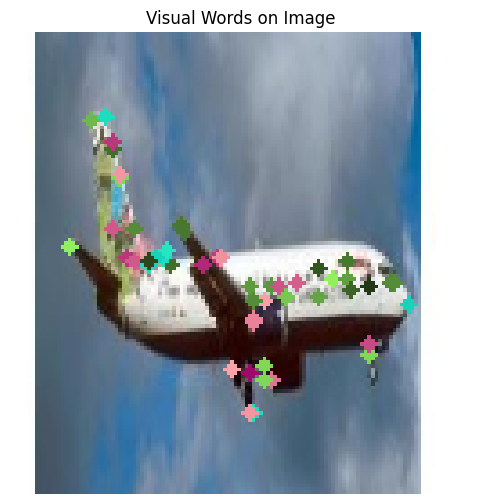

Visual words for class: car_side


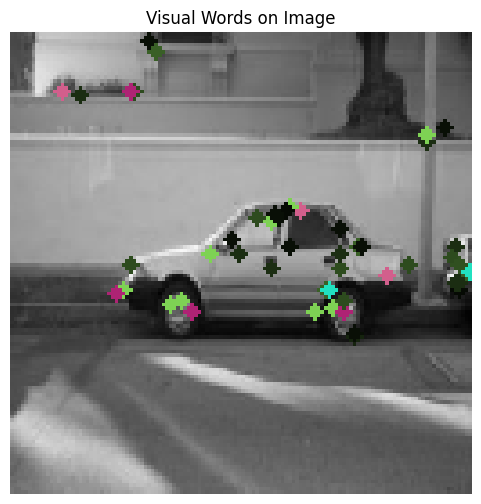

Visual words for class: Leopards


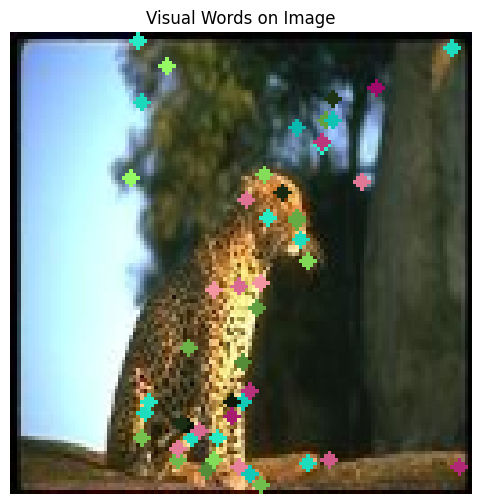

Visual words for class: watch


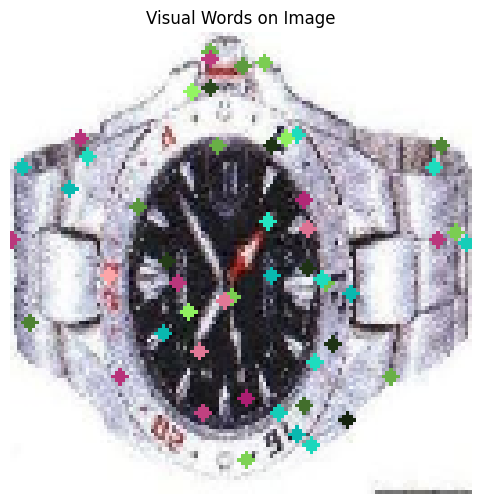

Visual words for class: Motorbikes


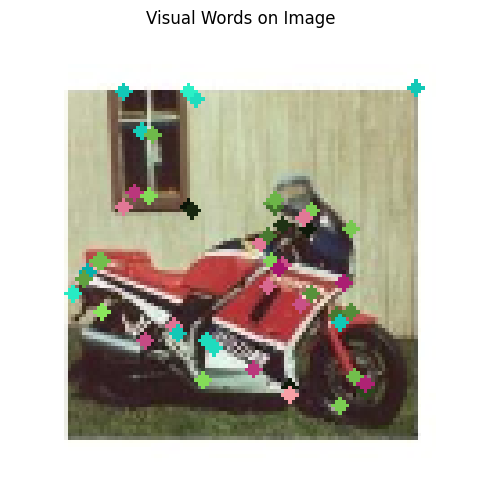

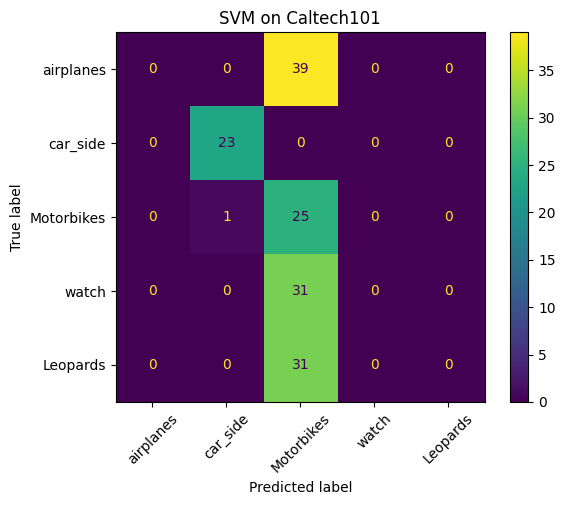

Accuracy for SVM on Caltech101: 0.3200
Classification Report:
              precision    recall  f1-score   support

   airplanes       0.00      0.00      0.00        39
    car_side       0.96      1.00      0.98        23
  Motorbikes       0.20      0.96      0.33        26
       watch       0.00      0.00      0.00        31
    Leopards       0.00      0.00      0.00        31

    accuracy                           0.32       150
   macro avg       0.23      0.39      0.26       150
weighted avg       0.18      0.32      0.21       150



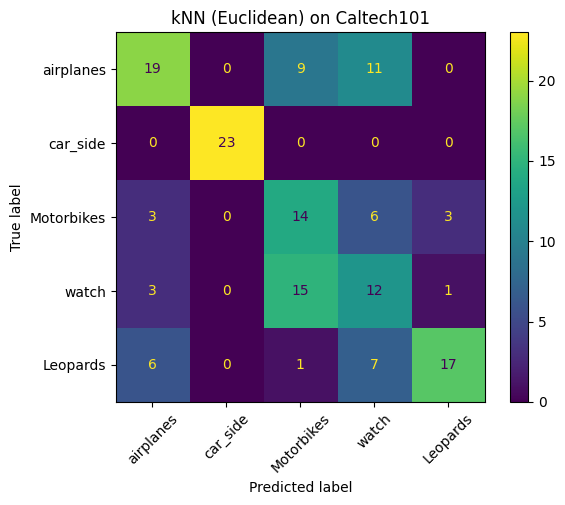

Accuracy for kNN (Euclidean) on Caltech101: 0.5667
Classification Report:
              precision    recall  f1-score   support

   airplanes       0.61      0.49      0.54        39
    car_side       1.00      1.00      1.00        23
  Motorbikes       0.36      0.54      0.43        26
       watch       0.33      0.39      0.36        31
    Leopards       0.81      0.55      0.65        31

    accuracy                           0.57       150
   macro avg       0.62      0.59      0.60       150
weighted avg       0.61      0.57      0.58       150



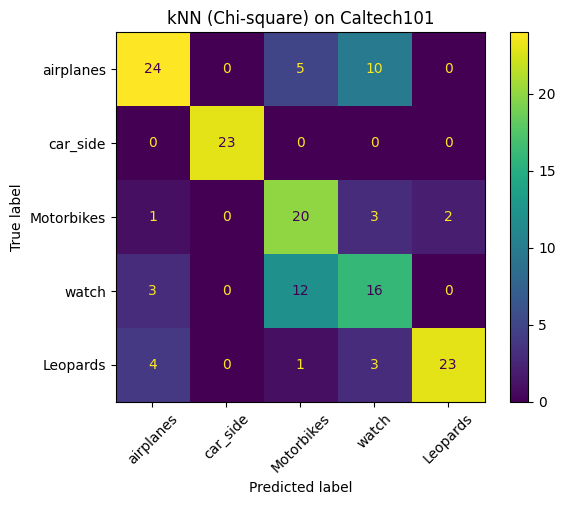

Accuracy for kNN (Chi-square) on Caltech101: 0.7067
Classification Report:
              precision    recall  f1-score   support

   airplanes       0.75      0.62      0.68        39
    car_side       1.00      1.00      1.00        23
  Motorbikes       0.53      0.77      0.62        26
       watch       0.50      0.52      0.51        31
    Leopards       0.92      0.74      0.82        31

    accuracy                           0.71       150
   macro avg       0.74      0.73      0.73       150
weighted avg       0.73      0.71      0.71       150



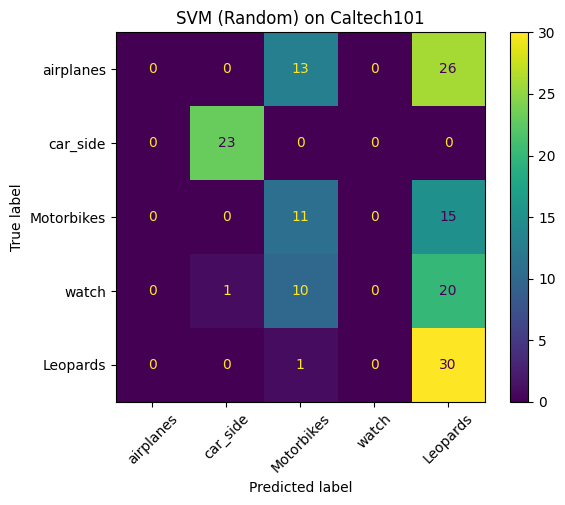

Accuracy for SVM (Random) on Caltech101: 0.4267
Classification Report:
              precision    recall  f1-score   support

   airplanes       0.00      0.00      0.00        39
    car_side       0.96      1.00      0.98        23
  Motorbikes       0.31      0.42      0.36        26
       watch       0.00      0.00      0.00        31
    Leopards       0.33      0.97      0.49        31

    accuracy                           0.43       150
   macro avg       0.32      0.48      0.37       150
weighted avg       0.27      0.43      0.31       150



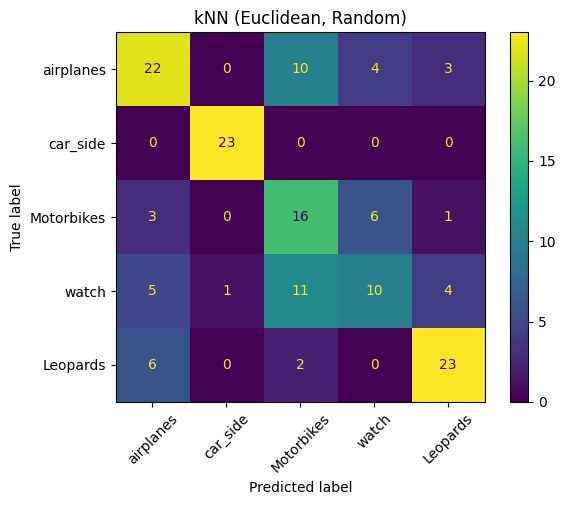

Accuracy for kNN (Euclidean, Random): 0.6267
Classification Report:
              precision    recall  f1-score   support

   airplanes       0.61      0.56      0.59        39
    car_side       0.96      1.00      0.98        23
  Motorbikes       0.41      0.62      0.49        26
       watch       0.50      0.32      0.39        31
    Leopards       0.74      0.74      0.74        31

    accuracy                           0.63       150
   macro avg       0.64      0.65      0.64       150
weighted avg       0.63      0.63      0.62       150



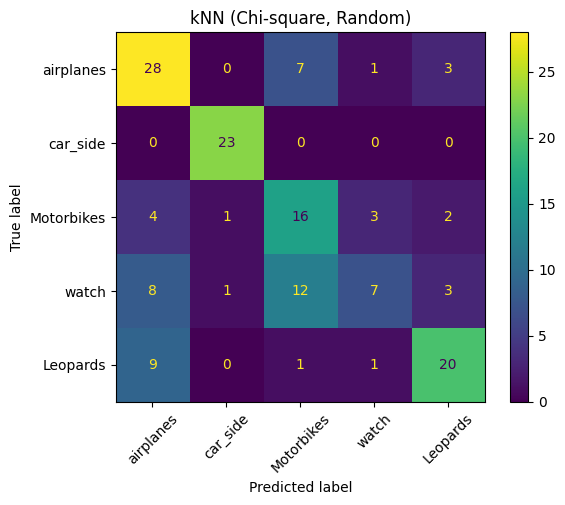

Accuracy for kNN (Chi-square, Random): 0.6267
Classification Report:
              precision    recall  f1-score   support

   airplanes       0.57      0.72      0.64        39
    car_side       0.92      1.00      0.96        23
  Motorbikes       0.44      0.62      0.52        26
       watch       0.58      0.23      0.33        31
    Leopards       0.71      0.65      0.68        31

    accuracy                           0.63       150
   macro avg       0.65      0.64      0.62       150
weighted avg       0.63      0.63      0.61       150



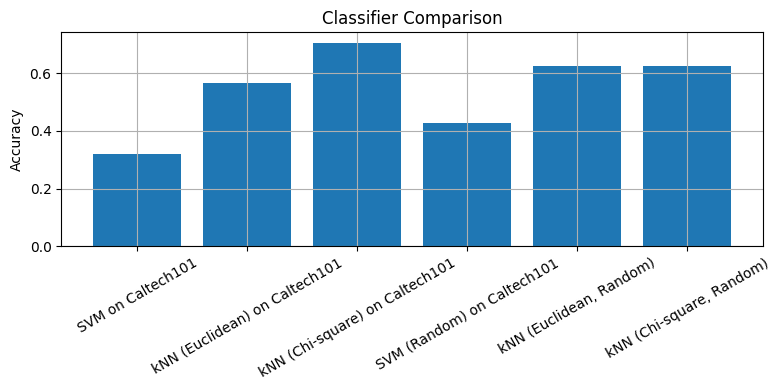

In [11]:
# Bag of Words classification pipeline for Caltech101 dataset

"""
TASK: Scene recognition with Bag of Words model

1. Extract visual words and build visual vocabulary:
    1.1. Select N points from image: randomly or using salient (e.g., Harris) points.
    1.2. Build a descriptor vector from convolution-based filtered images (Gaussian, Laplacian of Gaussian, gradient X, gradient Y) across multiple scales.
    1.3. For each point, concatenate filtered values (e.g., RGB or Lab) into a single feature vector.
    1.4. Cluster all descriptors from training set into K clusters (visual words).

2. Build a classifier using histograms of visual words:
    2.1. Assign each pixel (point) to nearest visual word based on feature distance.
    2.2. Build histogram for each image showing visual word frequency.
    2.3. Train classifiers: NN, kNN, SVM.

3. Evaluate classification system:
    3.1. Repeat steps 2.1–2.2 for test images.
    3.2. Compare histograms using different distance metrics (Euclidean, Chi-square).
    3.3. Predict category for test images.
    3.4. Evaluate accuracy with confusion matrix.
    3.5. Show confusion matrices for 4 combinations:
         - Random points + Euclidean
         - Random points + Chi-square
         - Salient points (Harris) + Euclidean
         - Salient points (Harris) + Chi-square

Report must include:
- Sample images per category
- Keypoint visualization
- Visual word mapping
- Confusion matrices
- Analysis of classification results
"""


import os
import cv2
import zipfile
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define dataset paths and URLs
CALTECH_URL = "https://data.caltech.edu/records/mzrjq-6wc02/files/caltech-101.zip"
CALTECH_ZIP = "caltech-101.zip"
BASE_DIR = "caltech101"
TAR_FILE = os.path.join(BASE_DIR, "caltech-101", "101_ObjectCategories.tar.gz")
DATASET_PATH = os.path.join(BASE_DIR, "101_ObjectCategories")

# Download and extract archive
def download_and_extract_caltech101():
    if not os.path.exists(TAR_FILE):
        print("Downloading caltech-101.zip...")
        urllib.request.urlretrieve(CALTECH_URL, CALTECH_ZIP)
        print("Extracting ZIP archive...")
        with zipfile.ZipFile(CALTECH_ZIP, 'r') as zip_ref:
            zip_ref.extractall(BASE_DIR)
    if not os.path.exists(DATASET_PATH):
        print("Extracting 101_ObjectCategories.tar.gz...")
        with tarfile.open(TAR_FILE, "r:gz") as tar:
            tar.extractall(path=BASE_DIR)

# Execute extraction
download_and_extract_caltech101()

# Configuration
CATEGORIES = ['airplanes', 'car_side', 'Motorbikes', 'watch', 'Leopards']
IMAGES_PER_CLASS = 100
IMAGE_SIZE = (128, 128)
POINTS_PER_IMAGE = 50
SCALES = [1, 2, 4, 8, 16]
K_CLUSTERS = 100

# Load dataset
# This function loads images from the specified categories in the Caltech101 dataset.
# Each image is resized to a fixed size and labeled by its category index.
def load_images():
    images = []
    labels = []
    loaded = []
    for idx, category in enumerate(CATEGORIES):
        files = glob(os.path.join(DATASET_PATH, category, '*.jpg'))[:IMAGES_PER_CLASS]
        if not files:
            print(f"Warning: No images found for {category}")
            continue
        loaded.append(category)
        for file in files:
            img = cv2.imread(file)
            if img is not None:
                img = cv2.resize(img, IMAGE_SIZE)
                images.append(img)
                labels.append(len(loaded) - 1)
    return np.array(images), np.array(labels), loaded

images, labels, loaded_categories = load_images()
print(f"Loaded {len(images)} images across {len(loaded_categories)} categories.")

if len(images) == 0:
    raise ValueError("No images loaded.")

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Visualize visual words from a sample image

# This function displays visual words (cluster assignments) on top of the original image.
# Each keypoint is drawn with a color based on its visual word label.
# If save_path is specified, the resulting visualization is saved to a file.
def visualize_visual_words(img, keypoints, words, save_path=None):
    img_vis = img.copy()
    for (y, x), w in zip(keypoints, words):
        cv2.circle(img_vis, (x, y), 2, (int(2 * w % 255), int(5 * w % 255), int(3 * w % 255)), -1)
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_vis, cv2.COLOR_BGR2RGB))
    plt.title("Visual Words on Image")
    plt.axis("off")
    # Save the visualization to file if a path is provided
    plt.savefig(save_path)
    plt.show()

# Visualize visual words on multiple training images (one per class) and save them
visualized_classes = set()
for img_idx, (img, label) in enumerate(zip(X_train, y_train)):
    class_name = loaded_categories[label]
    if class_name in visualized_classes:
        continue
    kp = select_harris_points(img, POINTS_PER_IMAGE)
    desc = extract_filtered_features(img, kp)
    words = kmeans.predict(desc)
    print(f"Visual words for class: {class_name}")
    save_file = f"visual_words_{class_name.lower()}.png"
    visualize_visual_words(img, kp, words, save_path=save_file)
    visualized_classes.add(class_name)
    if len(visualized_classes) >= len(loaded_categories):
        break

# Feature extraction: convolution-based descriptors
from scipy.ndimage import gaussian_filter, laplace, sobel

# This function performs step 1.2 of the task:
# For each selected keypoint in the image, it applies 4 types of filters
# (Gaussian, Laplacian of Gaussian, gradient X, gradient Y) at multiple scales,
# and constructs a feature vector from pixel values in the Lab color space.
def extract_filtered_features(img, keypoints):
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
    descriptors = []
    for scale in SCALES:
        gauss = np.stack([gaussian_filter(img_lab[..., c], sigma=scale) for c in range(3)], axis=-1)
        lap = np.stack([laplace(gauss[..., c]) for c in range(3)], axis=-1)
        grad_x = np.stack([sobel(gauss[..., c], axis=1) for c in range(3)], axis=-1)
        grad_y = np.stack([sobel(gauss[..., c], axis=0) for c in range(3)], axis=-1)
        for (y, x) in keypoints:
            v = np.concatenate([
                gauss[y, x], lap[y, x], grad_x[y, x], grad_y[y, x]
            ])
            descriptors.append(v)
    return np.array(descriptors)

# Select keypoints randomly
# Implements step 1.1 (salient point selection) using the Harris corner detector.
# Selects the strongest corners in the grayscale version of the image.
def select_harris_points(img, num_points):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    harris_response = cv2.cornerHarris(gray, 2, 3, 0.04)
    harris_response = cv2.dilate(harris_response, None)
    threshold = 0.01 * harris_response.max()
    keypoints = np.argwhere(harris_response > threshold)
    if len(keypoints) > num_points:
        np.random.shuffle(keypoints)
        keypoints = keypoints[:num_points]
    return [tuple(pt) for pt in keypoints]

# Extract all descriptors from training set using Harris keypoints
all_descriptors = []
image_keypoints = []
for img in X_train:
    kp = select_harris_points(img, POINTS_PER_IMAGE)
    desc = extract_filtered_features(img, kp)
    image_keypoints.append((kp, desc))
    all_descriptors.append(desc)

all_descriptors = np.vstack(all_descriptors)

# Cluster descriptors to form visual vocabulary
kmeans = KMeans(n_clusters=K_CLUSTERS, random_state=42)
kmeans.fit(all_descriptors)

# Build histogram for each image
# Builds a normalized histogram of visual word occurrences for a single image.
# Each descriptor is assigned to a cluster (visual word), and the frequency is computed.
def build_histogram(desc):
    words = kmeans.predict(desc)
    hist, _ = np.histogram(words, bins=range(K_CLUSTERS + 1), density=True)
    return hist

X_train_hist = np.array([build_histogram(desc) for _, desc in image_keypoints])

# Build histograms for test set
X_test_hist = []
for img in X_test:
    kp = select_harris_points(img, POINTS_PER_IMAGE)
    desc = extract_filtered_features(img, kp)
    hist = build_histogram(desc)
    X_test_hist.append(hist)

X_test_hist = np.array(X_test_hist)

# Chi-square distance function
def chi2_distance(a, b):
    return 0.5 * np.sum(((a - b) ** 2) / (a + b + 1e-10))

# kNN using chi-square distance
# Implements custom kNN classification using chi-square distance.
# For each test image histogram, computes distance to all training histograms.
# Chooses the most common label among the k nearest neighbors.
def knn_chi2(X_train, X_test, y_train, k=5):
    predictions = []
    for test_hist in X_test:
        dists = [chi2_distance(test_hist, train_hist) for train_hist in X_train]
        indices = np.argsort(dists)[:k]
        nearest_labels = [y_train[i] for i in indices]
        pred = max(set(nearest_labels), key=nearest_labels.count)
        predictions.append(pred)
    return np.array(predictions)

# Classifiers
svm = SVC(kernel='linear')
svm.fit(X_train_hist, y_train)
y_pred_svm = svm.predict(X_test_hist)

knn_euc = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euc.fit(X_train_hist, y_train)
y_pred_knn_euc = knn_euc.predict(X_test_hist)

y_pred_knn_chi2 = knn_chi2(X_train_hist, X_test_hist, y_train)

# Evaluation
results = []

# Evaluates a classifier's performance.
# Displays the confusion matrix and prints precision, recall, f1-score.
def evaluate(y_true, y_pred, title, labels):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='viridis', xticks_rotation=45)
    plt.title(title)
    plt.show()
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy for {title}: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=labels, zero_division=0))
    results.append((title, acc))

# Display evaluation
evaluate(y_test, y_pred_svm, "SVM on Caltech101", labels=loaded_categories)
evaluate(y_test, y_pred_knn_euc, "kNN (Euclidean) on Caltech101", labels=loaded_categories)
evaluate(y_test, y_pred_knn_chi2, "kNN (Chi-square) on Caltech101", labels=loaded_categories)

# Evaluate random points pipeline for 3.5 requirement

# Random keypoint selection

# Implements step 1.1 (random point selection).
# Selects N uniformly random pixels from the image excluding borders.
def select_random_points(img, num_points):
    h, w = img.shape[:2]
    return [(np.random.randint(5, h - 5), np.random.randint(5, w - 5)) for _ in range(num_points)]

# Extract descriptors for random keypoints
all_desc_random = []
img_kps_random = []
for img in X_train:
    kp = select_random_points(img, POINTS_PER_IMAGE)
    desc = extract_filtered_features(img, kp)
    img_kps_random.append((kp, desc))
    all_desc_random.append(desc)

X_train_hist_rand = np.array([build_histogram(desc) for _, desc in img_kps_random])

X_test_hist_rand = []
for img in X_test:
    kp = select_random_points(img, POINTS_PER_IMAGE)
    desc = extract_filtered_features(img, kp)
    hist = build_histogram(desc)
    X_test_hist_rand.append(hist)

X_test_hist_rand = np.array(X_test_hist_rand)

# Classify using random keypoints
svm_rand = SVC(kernel='linear')
svm_rand.fit(X_train_hist_rand, y_train)
y_pred_svm_rand = svm_rand.predict(X_test_hist_rand)

y_pred_knn_euc_rand = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(
    X_train_hist_rand, y_train).predict(X_test_hist_rand)

y_pred_knn_chi2_rand = knn_chi2(X_train_hist_rand, X_test_hist_rand, y_train)

# The following evaluations address task point 3.5:
# They compare four classification scenarios:
# 1. Harris + Euclidean
# 2. Harris + Chi-square
# 3. Random + Euclidean
# 4. Random + Chi-square
# Each model is trained and tested, and their confusion matrices and accuracies are reported.
# Evaluate random keypoints classifiers
evaluate(y_test, y_pred_svm_rand, "SVM (Random) on Caltech101", labels=loaded_categories)
evaluate(y_test, y_pred_knn_euc_rand, "kNN (Euclidean, Random)", labels=loaded_categories)
evaluate(y_test, y_pred_knn_chi2_rand, "kNN (Chi-square, Random)", labels=loaded_categories)

# Plot accuracy comparison
titles, accuracies = zip(*results)
plt.figure(figsize=(8, 4))
plt.bar(titles, accuracies)
plt.ylabel("Accuracy")
plt.title("Classifier Comparison")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()
